# KDE

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""
Kernel Density Estimation for d dimensional data (n points) from scratch for different kernels
"""

class KDE:
    def __init__(self, h, kernel):
        self.data = None
        self.h = h
        self.kernel = kernel
        self.n = None
        self.d = None
        self.kde = None

    def K(self, x):
        # box, gaussian and traingular kernels
        if self.kernel == 'box':
            return np.prod(np.abs(x) <= 0.5, axis=1)
        elif self.kernel == 'gaussian':
            return np.exp(-0.5*np.sum(x**2, axis=1)) * (2*np.pi)**(-self.d/2)
        elif self.kernel == 'triangular':
            return np.maximum(1 - np.sum(np.abs(x), axis=1), 0)
        else:
            print("Invalid kernel")
            return None

    def fit(self, data):
        self.data = data
        self.n, self.d = data.shape
        
    
    def predict(self):
        self.kde = np.sum([self.K((self.data - self.data[i])/self.h) for i in range(self.n)], axis=0)/(self.n*self.h**self.d)
        return self.kde
    
    def plot(self):
        if self.d == 2:
            x = self.data[:, 0]
            y = self.data[:, 1]
            colour = self.predict()
            plt.figure()
            plt.scatter(x, y, c=colour, s=0.75, cmap='viridis')
            plt.colorbar()
            plt.title("KDE plot: " + self.kernel + " kernel" + " with h = " + str(self.h))
            plt.xlabel("X")
            plt.ylabel("Y")
            # plt.grid(True, linestyle='--', alpha=0.5)
            plt.show()

        else:
            print("Can't plot for other than 2D data")

    
    

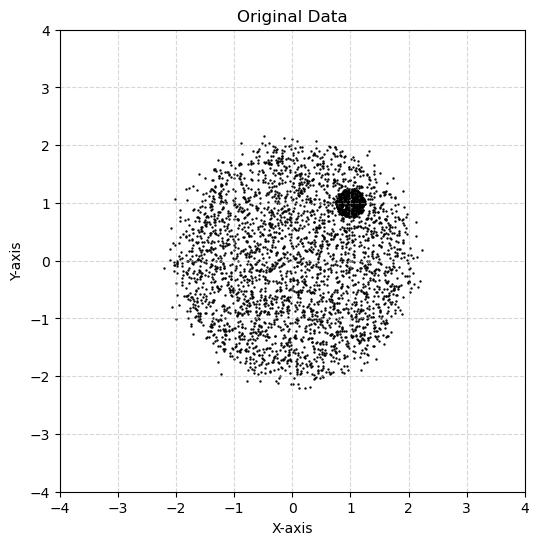

In [4]:
n_big = 3000
r_big = 2
theta_big = np.random.uniform(0, 2 * np.pi, n_big)
radii_large = np.sqrt(np.random.uniform(0, r_big**2, n_big))
x_large = radii_large * np.cos(theta_big)
y_large = radii_large * np.sin(theta_big)

noise = np.random.uniform(-1, 1, 2*n_big) * 0.25
x_large += noise[:n_big]
y_large += noise[n_big:]

n_small = 500
r_small = 0.25
theta_small = np.random.uniform(0, 2 * np.pi, n_small)
radii_small = np.sqrt(np.random.uniform(0, r_small**2, n_small))
x_small = radii_small * np.cos(theta_small) + 1
y_small = radii_small * np.sin(theta_small) + 1

x = np.concatenate((x_large, x_small))
y = np.concatenate((y_large, y_small))

data = np.vstack((x, y)).T

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=0.5, color='black')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title("Original Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


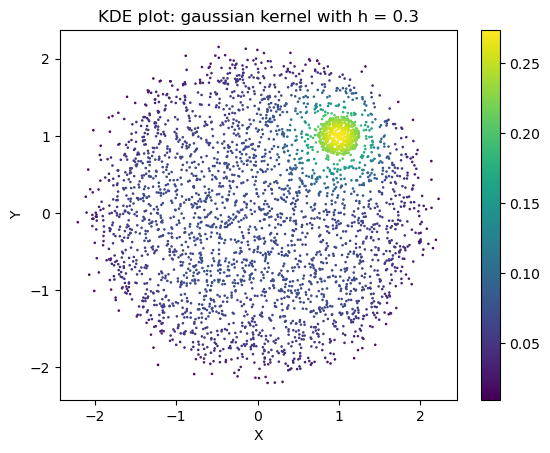

In [5]:
kde = KDE(h=0.3, kernel='gaussian')
kde.fit(data)
p_kde = kde.predict()
kde.plot()

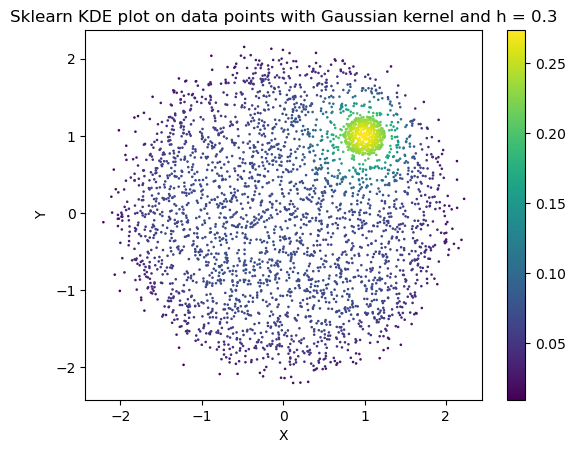

In [10]:
from sklearn.neighbors import KernelDensity
kde_sklearn = KernelDensity(bandwidth=0.3, kernel='gaussian')
kde_sklearn.fit(data)

dens_sklearn = np.exp(kde_sklearn.score_samples(data))

plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=dens_sklearn, s=0.75, cmap='viridis')
plt.colorbar()
plt.title("Sklearn KDE plot on data points with Gaussian kernel and h = 0.3")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

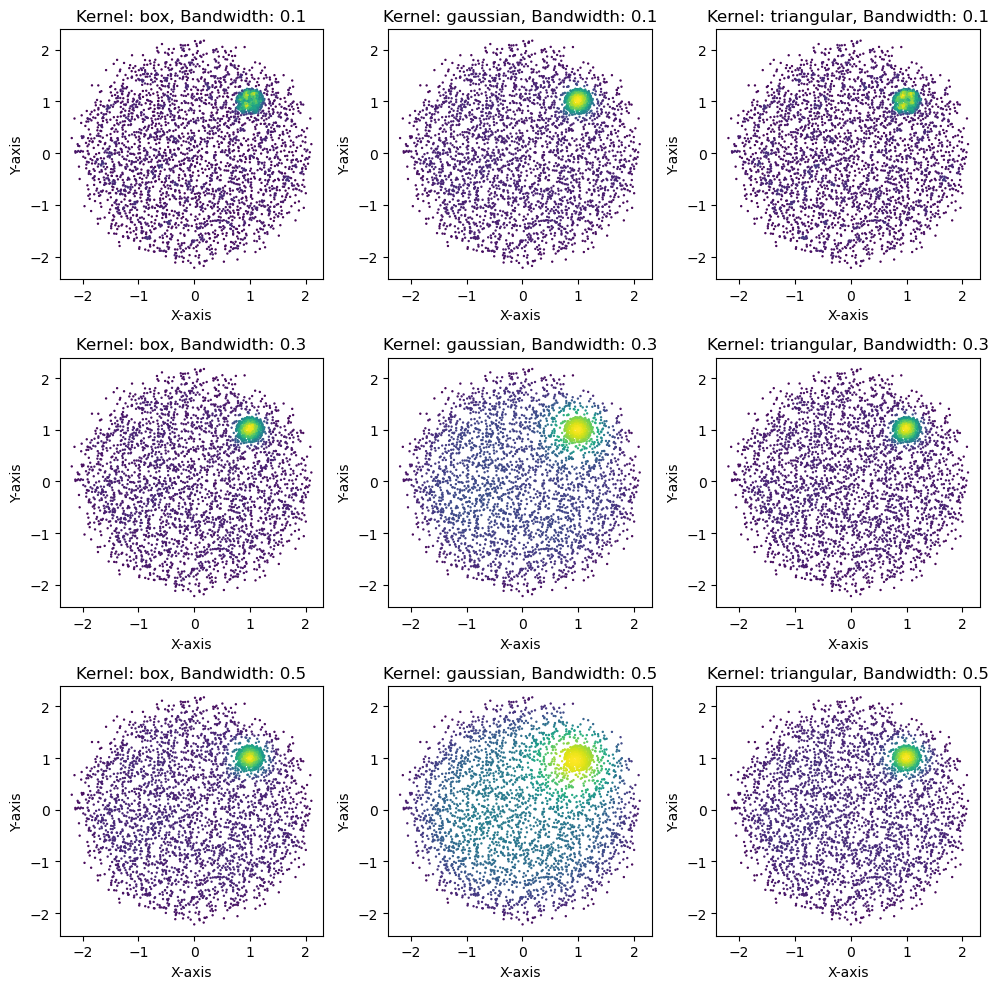

In [ ]:
h = [0.1, 0.3, 0.5]
kernels = ['box', 'gaussian', 'triangular']

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        kde = KDE(h=h[i], kernel=kernels[j])
        kde.fit(data)
        p_kde = kde.predict()
        axs[i, j].scatter(x, y, c=p_kde, s=0.5, cmap='viridis')
        axs[i, j].set_title(f"Kernel: {kernels[j]}, Bandwidth: {h[i]}")
        axs[i, j].set_xlabel("X-axis")
        axs[i, j].set_ylabel("Y-axis")
        # axs[i, j].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

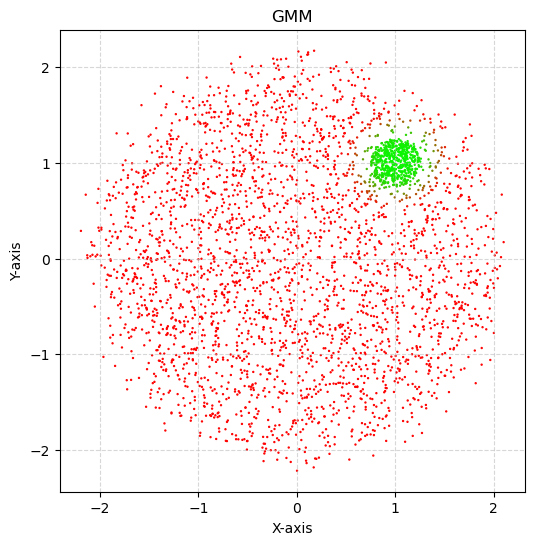

In [175]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..','..')))
from models.gmm.gmm import GMM

def gmm_on_circle_data(k=2):
    if k > 6:
        print("Can't have more than 6 colours for plotting")
        return
    gmm = GMM(k=k, max_iters=100)
    gmm.fit(data)
    p_gmm = gmm.getMembership()

    colors = np.array([
        [1, 0, 0],  # Red
        [0, 1, 0],  # Green
        [0, 0, 1],  # Blue
        [1, 1, 0],  # Yellow
        [1, 0, 1],  # Magenta
        [0, 1, 1],  # Cyan
    ])
    point_colours = np.dot(p_gmm, colors[:k])

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c=point_colours, s=0.5)
    plt.title("GMM")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

gmm_on_circle_data(k=2)


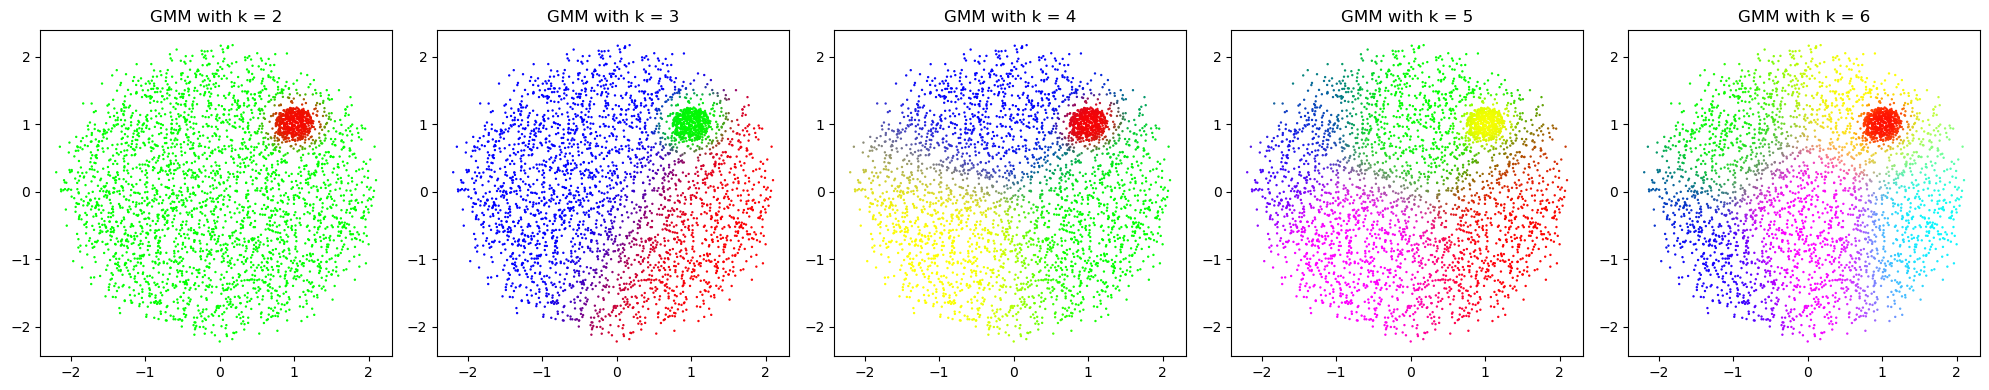

In [177]:
def get_subplots_gmm_for_diff_k(k_values):
    x = data[:, 0]
    y = data[:, 1]
    fig, axs = plt.subplots(1, len(k_values), figsize=(20, 4))
    for i in range(len(k_values)):
        k = k_values[i]
        gmm = GMM(k=k, max_iters=100)
        gmm.fit(data)
        p_gmm = gmm.getMembership()

        colors = np.array([
            [1, 0, 0],  # Red
            [0, 1, 0],  # Green
            [0, 0, 1],  # Blue
            [1, 1, 0],  # Yellow
            [1, 0, 1],  # Magenta
            [0, 1, 1],  # Cyan
        ])
        point_colours = np.dot(p_gmm, colors[:k])

        axs[i].set_title(f"GMM with k = {k}")
        axs[i].scatter(x, y, c=point_colours, s=0.5)
    plt.tight_layout()
    plt.show()

get_subplots_gmm_for_diff_k([2, 3, 4, 5, 6])

The observation with number of components = 2 for GMM, we get 2 clusters. The one for the bigger circle and one for the smaller circle of data points. With an increase in the number of components for GMM, the data (the points in the bigger circle) is further split into smaller and smaller clusters. This tells us that the gaussian mixture model is not able to capture the underlying structure of the data and depends on the number of components to split the data into clusters. Whereas KDE is able to capture the underlying structure of the data and does not depend on the number of components to split the data into clusters. It consistently fits the data well even after changing the bandwith parameter 'h' as shown in the plots above.